## Layout of the IQM-20 chip

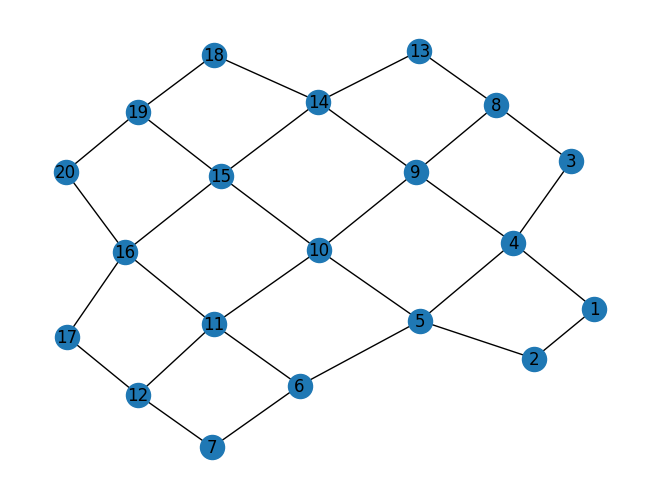

In [108]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from copy import deepcopy

g = nx.Graph()

edges = [
    (1, 2), (1, 4), (3, 4), (2, 5), (4, 5),
    (5, 6), (10, 11), (6, 7), (7, 12), (11, 12),
    (12, 17), (16, 17), (16, 20), (15, 16), (19, 20),
    (11, 16), (15, 19), (18, 19), (14, 18), (14, 15),
    (13, 14), (10, 15), (9, 14), (8, 13), (9, 10), 
    (8, 9), (3, 8), (6, 11), (5, 10), (4, 9)
]

g.add_edges_from(edges)
nx.draw(g, with_labels=True)

### Utils

#### `qibo.cskim_utils.connectivity.iqm_connectivity_nx`

```py
def iqm_connectivity_nx():
    """
    Returns the connectivity graph of the IQM-20 chip architecture (For Qibo).
    """
    g = nx.Graph()
    edges = [
        (1, 2), (1, 4), (3, 4), (2, 5), (4, 5),
        (5, 6), (10, 11), (6, 7), (7, 12), (11, 12),
        (12, 17), (16, 17), (16, 20), (15, 16), (19, 20),
        (11, 16), (15, 19), (18, 19), (14, 18), (14, 15),
        (13, 14), (10, 15), (9, 14), (8, 13), (9, 10), 
        (8, 9), (3, 8), (6, 11), (5, 10), (4, 9)
    ]
    g.add_edges_from(edges)
    # nx.draw(g, with_labels=True)
    return g
```

## Transpilation on IQM-20 layout

In [109]:
from qibo.cskim_utils.circuit_info import count_czs_qibo
from qibo.cskim_utils.connectivity import iqm_connectivity_nx
from qibo.cskim_utils.gen_circuit import gen_transpiled_circuits_qibo, random_control_circuit_qibo
from qibo.transpiler.placer import *
from qibo.transpiler.router import Sabre

In [128]:
# Random 10 cz circuit on 20 qubit
random_20qc = random_control_circuit_qibo(20, 10)

# IQM-20 connectivity
conn = iqm_connectivity_nx()

### Placer: SABRE / Router: SABRE

In [135]:
circuit = deepcopy(random_20qc)

# Placer and Router
router_sabre = Sabre(connectivity=conn)
placer = ReverseTraversal(connectivity=conn, routing_algorithm=router_sabre)

# Transpile
transpiled_circ = gen_transpiled_circuits_qibo(circuit, conn, placer, router_sabre)
print("#czs after_transpiling", count_czs_qibo(transpiled_circ))

#czs after_transpiling 145


### Placer: Random / Router: SABRE

In [130]:
circuit = deepcopy(random_20qc)

# Placer and Router
router_sabre = Sabre(connectivity=conn)
placer = Random(connectivity=conn)

# Transpile
transpiled_circ = gen_transpiled_circuits_qibo(circuit, conn, placer, router_sabre)
print("#czs after_transpiling", count_czs_qibo(transpiled_circ))

#czs after_transpiling 307


### Placer: Subgraph Isomorphism / Router: SABRE

In [131]:
circuit = deepcopy(random_20qc)

# Placer and Router
router_sabre = Sabre(connectivity=conn)
placer = Subgraph(connectivity=conn)

# Transpile
transpiled_circ = gen_transpiled_circuits_qibo(circuit, conn, placer, router_sabre)
print("#czs after_transpiling", count_czs_qibo(transpiled_circ))

#czs after_transpiling 10


### Placer: Trivial / Router: SABRE

In [132]:
circuit = deepcopy(random_20qc)

# Placer and Router
router_sabre = Sabre(connectivity=conn)
placer = Trivial(connectivity=conn)

# Transpile
transpiled_circ = gen_transpiled_circuits_qibo(circuit, conn, placer, router_sabre)
print("#czs after_transpiling", count_czs_qibo(transpiled_circ))

#czs after_transpiling 199
